### First some pip installs you may need to run code

In [1]:
pip install -u pandas-datareader

Note: you may need to restart the kernel to use updated packages.



Usage:   
  C:\Users\dan.marks\Anaconda3\envs\mlenv\python.exe -m pip install [options] <requirement specifier> [package-index-options] ...
  C:\Users\dan.marks\Anaconda3\envs\mlenv\python.exe -m pip install [options] -r <requirements file> [package-index-options] ...
  C:\Users\dan.marks\Anaconda3\envs\mlenv\python.exe -m pip install [options] [-e] <vcs project url> ...
  C:\Users\dan.marks\Anaconda3\envs\mlenv\python.exe -m pip install [options] [-e] <local project path> ...
  C:\Users\dan.marks\Anaconda3\envs\mlenv\python.exe -m pip install [options] <archive url/path> ...

no such option: -u


In [2]:
pip install statsmodels 

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [1]:
# import librarys
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import os
import time
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
plt.style.use('seaborn')

## Getting Data from Yahoo Finance

In [2]:
#get moderna stock price
mrnadf = web.DataReader('mrna', data_source='yahoo', start='2019-01-01', end='2021-05-01')

mrnadf

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,15.450000,14.510000,14.930000,15.330000,2318100,15.330000
2019-01-03,16.080000,15.200000,15.490000,15.500000,1588900,15.500000
2019-01-04,17.500000,15.894000,16.000000,16.959999,1651800,16.959999
2019-01-07,17.940001,16.180000,17.540001,16.270000,1585400,16.270000
2019-01-08,17.468000,16.049999,17.350000,16.950001,1892700,16.950001
...,...,...,...,...,...,...
2021-04-26,179.600006,168.880005,171.789993,177.610001,12201700,177.610001
2021-04-27,185.529999,178.179993,178.360001,183.410004,12925700,183.410004
2021-04-28,182.889999,176.119995,182.369995,178.679993,8375400,178.679993


In [3]:
#get ABNB stock price
abnbdf = web.DataReader('ABNB', data_source='yahoo', start='2019-01-01', end='2021-05-01')

abnbdf

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-10,165.000000,141.250000,146.000000,144.710007,70447500,144.710007
2020-12-11,151.500000,135.100006,146.550003,139.250000,26980800,139.250000
2020-12-14,135.300003,125.160004,135.000000,130.000000,16966100,130.000000
2020-12-15,127.599998,121.500000,126.690002,124.800003,10914400,124.800003
2020-12-16,142.000000,124.910004,125.830002,137.990005,20409600,137.990005
...,...,...,...,...,...,...
2021-04-26,176.031006,171.070007,175.210007,174.880005,2549400,174.880005
2021-04-27,179.610001,174.800003,176.164993,177.940002,2883000,177.940002
2021-04-28,181.669998,173.350998,174.436996,180.000000,2409700,180.000000


In [4]:
#get ZOOM stock price
zmdf = web.DataReader('ZM', data_source='yahoo', start='2019-01-01', end='2021-05-01')

zmdf

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-04-18,66.000000,60.320999,65.000000,62.000000,25764700,62.000000
2019-04-22,68.900002,59.939999,61.000000,65.699997,9949700,65.699997
2019-04-23,74.168999,65.550003,66.870003,69.000000,6786500,69.000000
2019-04-24,71.500000,63.160000,71.400002,63.200001,4973500,63.200001
2019-04-25,66.849998,62.599998,64.739998,65.000000,3863300,65.000000
...,...,...,...,...,...,...
2021-04-26,338.000000,329.209991,337.510010,336.420013,2286700,336.420013
2021-04-27,341.679993,330.890015,336.390015,333.489990,2208300,333.489990
2021-04-28,334.700989,326.045013,330.239990,331.250000,1437600,331.250000


In [5]:
#get CRWD stock price
crwddf = web.DataReader('CRWD', data_source='yahoo', start='2019-01-01', end='2021-05-01')

crwddf

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-06-12,67.000000,56.000000,63.500000,58.000000,19449200,58.000000
2019-06-13,69.669998,61.599998,63.860001,67.559998,10923900,67.559998
2019-06-14,70.790001,63.020000,69.779999,64.160004,6264200,64.160004
2019-06-17,70.010002,62.000000,64.750000,70.010002,3247500,70.010002
2019-06-18,78.699997,71.500000,73.000000,76.500000,6612600,76.500000
...,...,...,...,...,...,...
2021-04-26,225.100006,215.929993,220.050003,224.470001,3614600,224.470001
2021-04-27,227.199997,219.891006,225.479996,221.250000,2326700,221.250000
2021-04-28,223.259995,215.022995,217.869995,220.240005,2486600,220.240005


In [6]:
#get DOCU stock price
docudf = web.DataReader('DOCU', data_source='yahoo', start='2019-01-01', end='2021-05-01')

docudf

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,40.830002,39.139999,39.270000,40.820000,1674300,40.820000
2019-01-03,40.520000,38.799999,40.000000,38.830002,986900,38.830002
2019-01-04,41.415001,39.419998,39.520000,40.900002,1852600,40.900002
2019-01-07,42.200001,39.500000,40.040001,41.689999,2630900,41.689999
2019-01-08,42.320000,40.931000,41.959999,42.080002,3192600,42.080002
...,...,...,...,...,...,...
2021-04-26,234.440002,223.681000,225.399994,234.360001,2255600,234.360001
2021-04-27,234.729996,228.500000,234.009995,230.020004,1355600,230.020004
2021-04-28,236.106995,227.164001,227.425003,232.300003,1584900,232.300003


## Visualizing the Data

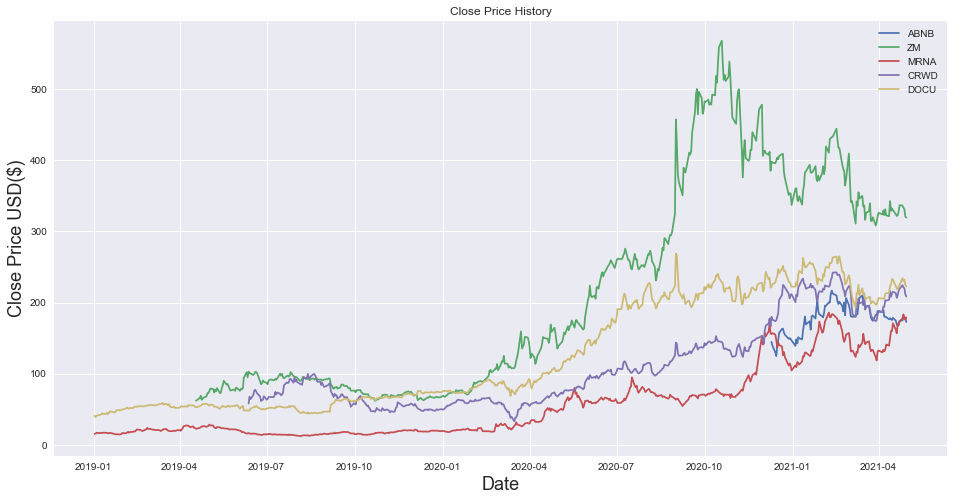

In [7]:
#plot close prices
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(abnbdf['Close'], label='ABNB')
plt.plot(zmdf['Close'], label='ZM')
plt.plot(mrnadf['Close'], label='MRNA')
plt.plot(crwddf['Close'], label='CRWD')
plt.plot(docudf['Close'], label='DOCU')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.legend()

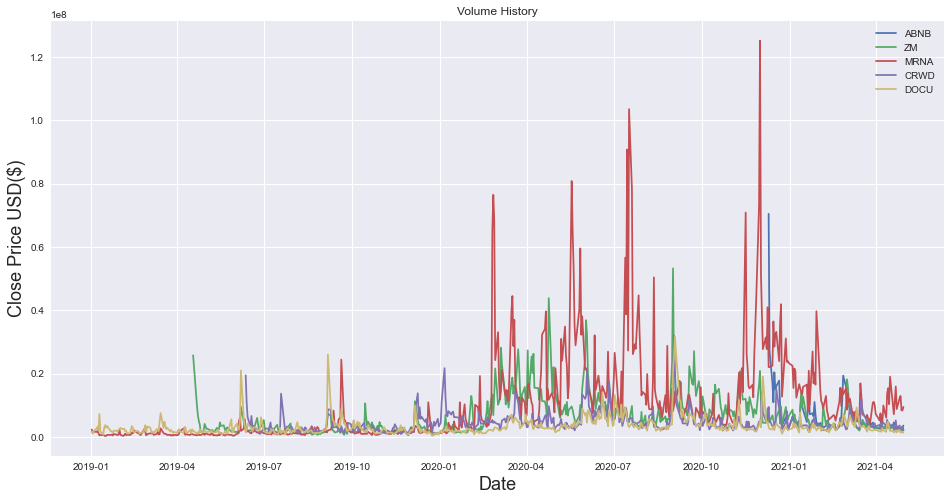

In [8]:
plt.figure(figsize=(16,8))
plt.title('Volume History')
plt.plot(abnbdf['Volume'], label='ABNB')
plt.plot(zmdf['Volume'], label='ZM')
plt.plot(mrnadf['Volume'], label='MRNA')
plt.plot(crwddf['Volume'], label='CRWD')
plt.plot(docudf['Volume'], label='DOCU')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.legend()

In [12]:
#creating new column = 'Total Traded' which is close price * volume 

In [9]:
abnbdf['Total Traded'] = abnbdf['Close']*abnbdf['Volume']
zmdf['Total Traded'] = zmdf['Close']*zmdf['Volume']
mrnadf['Total Traded'] = mrnadf['Close']*mrnadf['Volume']
crwddf['Total Traded'] = crwddf['Close']*crwddf['Volume']
docudf['Total Traded'] = docudf['Close']*docudf['Volume']

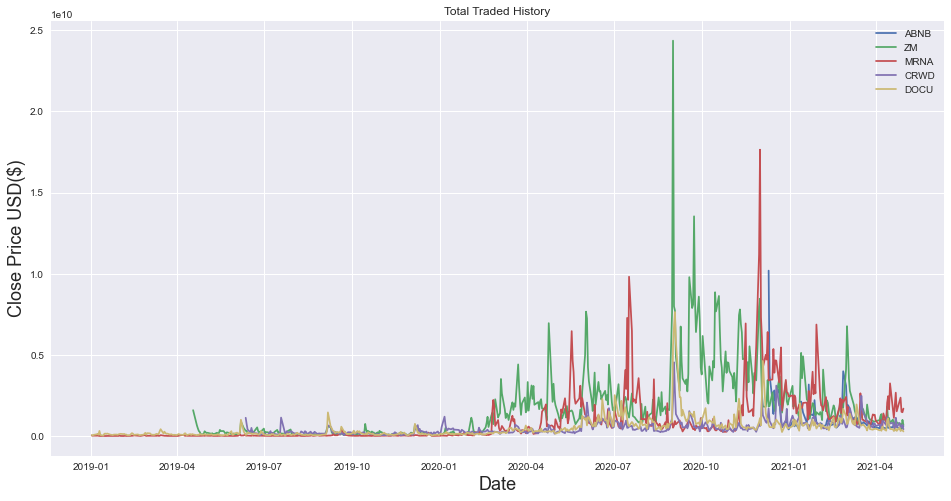

In [10]:
plt.figure(figsize=(16,8))
plt.title('Total Traded History')
plt.plot(abnbdf['Total Traded'], label='ABNB')
plt.plot(zmdf['Total Traded'], label='ZM')
plt.plot(mrnadf['Total Traded'], label='MRNA')
plt.plot(crwddf['Total Traded'], label='CRWD')
plt.plot(docudf['Total Traded'], label='DOCU')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.legend()

##### Before we look at 1 stock change 'ticker'df name to be df so code is reusable with minimal changes

In [12]:
# INPUT TICKER DF TO BE CHANGED TO 'df' for future code!
df = crwddf

In [13]:
df

,High,Low,Open,Close,Volume,Adj Close,Total Traded
Date,,,,,,,
2019-06-12,67.000000,56.000000,63.500000,58.000000,19449200,58.000000,1.128054e+09
2019-06-13,69.669998,61.599998,63.860001,67.559998,10923900,67.559998,7.380187e+08
2019-06-14,70.790001,63.020000,69.779999,64.160004,6264200,64.160004,4.019111e+08
2019-06-17,70.010002,62.000000,64.750000,70.010002,3247500,70.010002,2.273575e+08
2019-06-18,78.699997,71.500000,73.000000,76.500000,6612600,76.500000,5.058639e+08
...,...,...,...,...,...,...,...
2021-04-26,225.100006,215.929993,220.050003,224.470001,3614600,224.470001,8.113693e+08
2021-04-27,227.199997,219.891006,225.479996,221.250000,2326700,221.250000,5.147824e+08
2021-04-28,223.259995,215.022995,217.869995,220.240005,2486600,220.240005,5.476488e+08


## Take a look at the Data!

In [14]:
from statsmodels.tsa.stattools import adfuller
#ADF test will tell us if model is stationary. If p-value is greater than .05 we can conclude it is not stationary

result = adfuller(df.Close.dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -0.030224963474243836
p-value: 0.9559599757366928


In [15]:
from statsmodels.graphics.tsaplots import plot_acf

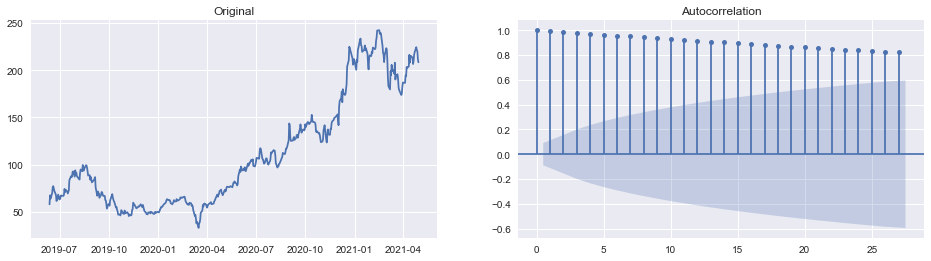

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(df.Close)
ax1.set_title('Original')
plot_acf(df.Close, ax=ax2);

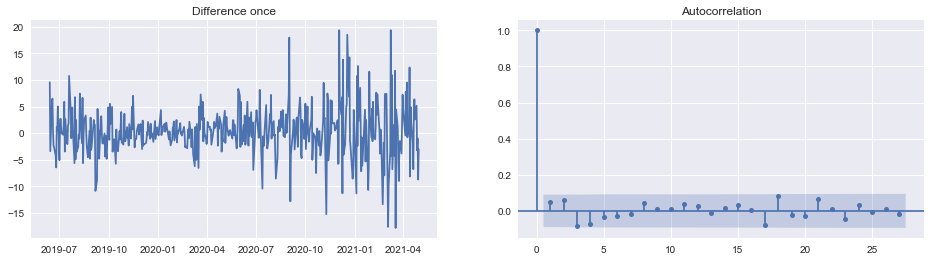

In [17]:
# check if we difference once

diff = df.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Difference once")
plot_acf(diff, ax=ax2);

##### We can conclude the data how many times the data should be differenced by the longest line in the auto correlation

In [18]:
from pmdarima.arima.utils import ndiffs

In [19]:
#another function to double check # of difference
ndiffs(df.Close, test='adf')

1

In [20]:
from statsmodels.graphics.tsaplots import plot_pacf

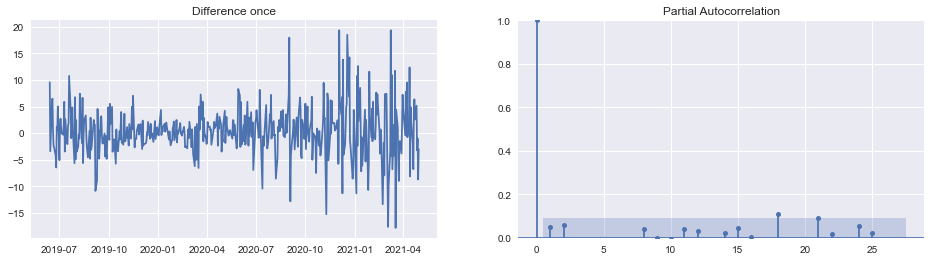

In [22]:
diff = df.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0, 1)
plot_pacf(diff, ax=ax2);

#we see 1 can be used as p terms

In [25]:
#Finding q. q is order of the moving average. The # of lagged forecast errors that should go into ARIMA model

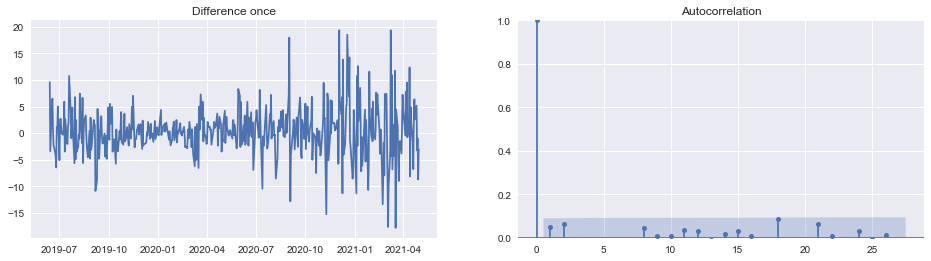

In [23]:
diff = df.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0,1)
plot_acf(diff, ax=ax2);

#we can see our q term could be 1, 3

## Getting started with ARIMA

In [24]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

### ARIMA with split of y_train and y_test 

In [25]:
#get close data alone

df = df[['Close']].copy()
df.info

<bound method DataFrame.info of                  Close
Date                  
2019-06-12   58.000000
2019-06-13   67.559998
2019-06-14   64.160004
2019-06-17   70.010002
2019-06-18   76.500000
...                ...
2021-04-26  224.470001
2021-04-27  221.250000
2021-04-28  220.240005
2021-04-29  211.529999
2021-04-30  208.509995

[476 rows x 1 columns]>

In [26]:
#split data into test and split at .80 (of )
y_train = df.iloc[:round(df.shape[0]*.80)]
y_test = df.iloc[round(df.shape[0]*.80):]

In [27]:
y_train.tail(10)

,Close
Date,
2020-11-30,153.279999
2020-12-01,147.500000
2020-12-02,141.839996
2020-12-03,161.190002
2020-12-04,167.259995
2020-12-07,170.720001
2020-12-08,177.479996
2020-12-09,166.169998
2020-12-10,179.990005


In [28]:
y_test.head(10)

,Close
Date,
2020-12-14,173.800003
2020-12-15,174.929993
2020-12-16,179.789993
2020-12-17,185.250000
2020-12-18,203.750000
2020-12-21,210.649994
2020-12-22,224.899994
2020-12-23,223.500000
2020-12-24,221.119995


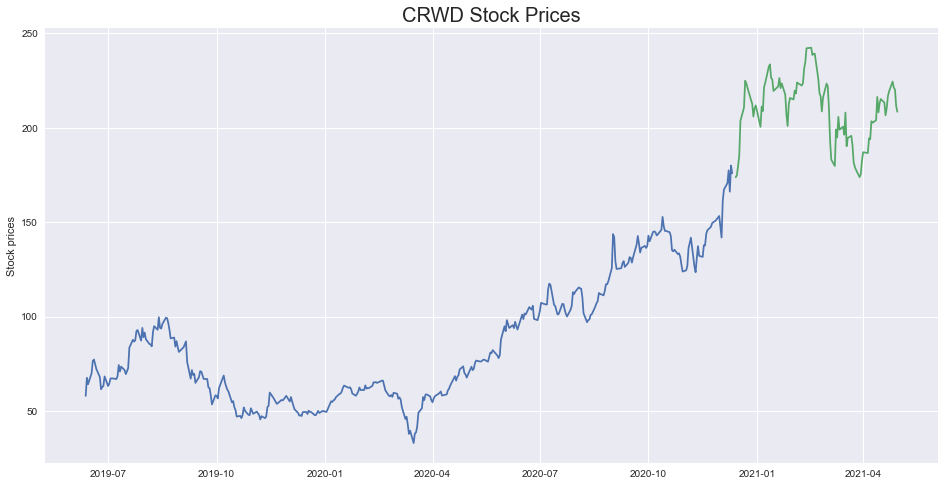

In [30]:
#plot train and test
plt.figure(figsize=(16,8))
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Actual')
plt.ylabel("Stock prices")
plt.title('CRWD Stock Prices',fontsize=20)
plt.show()

In [31]:
print("start:",y_test.index.min())
print("end:",y_test.index.max())

start: 2020-12-14 00:00:00
end: 2021-04-30 00:00:00


In [32]:
y_test.shape

(95, 1)

In [33]:
y_train.shape

(381, 1)

In [36]:
arima = ARIMA(y_train,order=(1,1,1)).fit(disp=False)
y_arima = arima.predict(381,475,typ='levels')
y_arima.index = y_test.index

C:\Users\dan.marks\Anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\dan.marks\Anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\dan.marks\Anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace fra

In [37]:
#Check MSE of model
arima_mse = mse(y_arima,y_test)

mse(y_arima,y_test)


798.6540791724468

In [38]:
arima_df = pd.DataFrame(y_arima)

arima_df

,0
Date,
2020-12-14,175.021818
2020-12-15,176.396946
2020-12-16,175.767404
2020-12-17,176.905640
2020-12-18,176.484996
...,...
2021-04-26,203.474475
2021-04-27,203.784339
2021-04-28,204.094178


In [39]:
arima_df['Actual'] = y_test['Close'].values

arima_df

,0,Actual
Date,,
2020-12-14,175.021818,173.800003
2020-12-15,176.396946,174.929993
2020-12-16,175.767404,179.789993
2020-12-17,176.905640,185.250000
2020-12-18,176.484996,203.750000
...,...,...
2021-04-26,203.474475,224.470001
2021-04-27,203.784339,221.250000
2021-04-28,204.094178,220.240005


In [40]:
arima_df.columns=['Forecasted', 'Actual']

arima_df

,Forecasted,Actual
Date,,
2020-12-14,175.021818,173.800003
2020-12-15,176.396946,174.929993
2020-12-16,175.767404,179.789993
2020-12-17,176.905640,185.250000
2020-12-18,176.484996,203.750000
...,...,...
2021-04-26,203.474475,224.470001
2021-04-27,203.784339,221.250000
2021-04-28,204.094178,220.240005


In [41]:
arima_df['MPE'] = np.mean((arima_df['Forecasted'] - arima_df['Actual'] )/arima_df['Actual']) 

arima_df

,Forecasted,Actual,MPE
Date,,,
2020-12-14,175.021818,173.800003,-0.0864
2020-12-15,176.396946,174.929993,-0.0864
2020-12-16,175.767404,179.789993,-0.0864
2020-12-17,176.905640,185.250000,-0.0864
2020-12-18,176.484996,203.750000,-0.0864
...,...,...,...
2021-04-26,203.474475,224.470001,-0.0864
2021-04-27,203.784339,221.250000,-0.0864
2021-04-28,204.094178,220.240005,-0.0864


In [42]:
#calculate MPE score

arima_mpe = np.mean(arima_df['MPE'])

arima_mpe


-0.08640022010203219

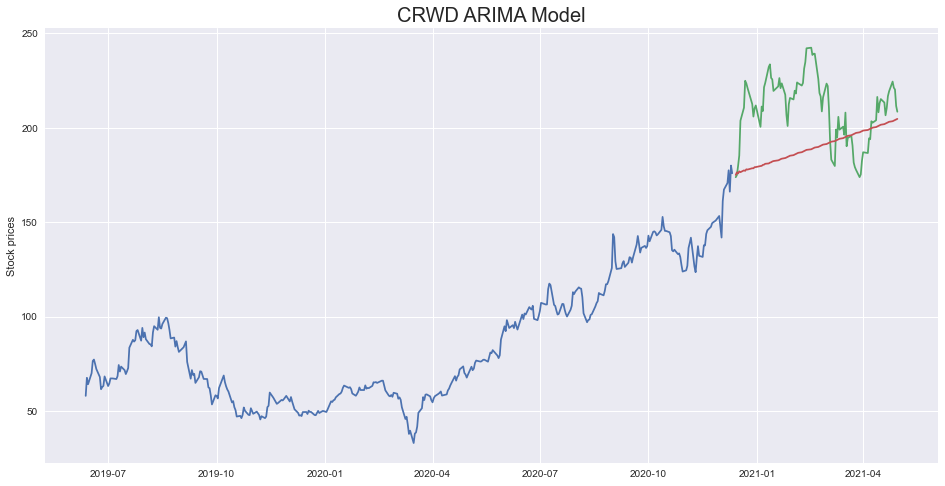

In [43]:
#Plot ARIMA model

plt.figure(figsize=(16,8))
plt.plot(y_train,label='Train')
plt.plot(y_test,label='Actual')
plt.plot(y_arima,label='ARIMA Predict')
plt.ylabel("Stock prices")
plt.title('CRWD ARIMA Model',fontsize=20)
#save fig
plt.savefig("ARIMA_CRWD.png",)

plt.show()

## Checking ARMA Model

In [44]:
from statsmodels.tsa.arima_model import ARMA

In [60]:
arma = ARMA(y_train,order=(1,0)).fit()
y_arma =arma.predict(381,475)
y_arma.index = y_test.index

C:\Users\dan.marks\Anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\dan.marks\Anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but 

In [61]:
#Check MSE of model
arma_mse = mse(y_arma,y_test)

mse(y_arma,y_test)

2088.0778862810466

In [62]:
arma_df = pd.DataFrame(y_arma)

arma_df

,0
Date,
2020-12-14,175.721048
2020-12-15,175.522663
2020-12-16,175.324843
2020-12-17,175.127585
2020-12-18,174.930889
...,...
2021-04-26,159.948933
2021-04-27,159.795410
2021-04-28,159.642324


In [63]:
arma_df['Actual'] = y_test['Close'].values

arma_df

,0,Actual
Date,,
2020-12-14,175.721048,173.800003
2020-12-15,175.522663,174.929993
2020-12-16,175.324843,179.789993
2020-12-17,175.127585,185.250000
2020-12-18,174.930889,203.750000
...,...,...
2021-04-26,159.948933,224.470001
2021-04-27,159.795410,221.250000
2021-04-28,159.642324,220.240005


In [64]:
arma_df.columns=['Forecasted', 'Actual']

arma_df

,Forecasted,Actual
Date,,
2020-12-14,175.721048,173.800003
2020-12-15,175.522663,174.929993
2020-12-16,175.324843,179.789993
2020-12-17,175.127585,185.250000
2020-12-18,174.930889,203.750000
...,...,...
2021-04-26,159.948933,224.470001
2021-04-27,159.795410,221.250000
2021-04-28,159.642324,220.240005


In [65]:
arma_df['MPE'] = np.mean((arma_df['Forecasted'] - arma_df['Actual'] )/arma_df['Actual']) 

arma_df

,Forecasted,Actual,MPE
Date,,,
2020-12-14,175.721048,173.800003,-0.197704
2020-12-15,175.522663,174.929993,-0.197704
2020-12-16,175.324843,179.789993,-0.197704
2020-12-17,175.127585,185.250000,-0.197704
2020-12-18,174.930889,203.750000,-0.197704
...,...,...,...
2021-04-26,159.948933,224.470001,-0.197704
2021-04-27,159.795410,221.250000,-0.197704
2021-04-28,159.642324,220.240005,-0.197704


In [66]:
#calculate MPE score

arma_mpe = np.mean(arma_df['MPE'])

arma_mpe

-0.19770447893174745

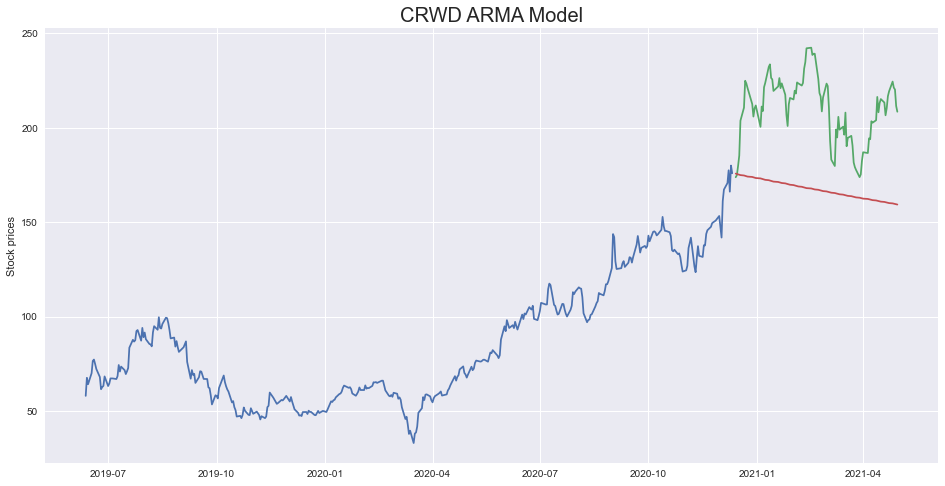

In [67]:
plt.figure(figsize=(16,8))
plt.plot(y_train,label='Train')
plt.plot(y_test,label='Actual')
plt.plot(y_arma,label='ARIMA Predict')
plt.ylabel("Stock prices")
plt.title('CRWD ARMA Model',fontsize=20)
#save fig
plt.savefig("ARMA_CRWD.png",)

plt.show()

### Visualize results

In [68]:
mse_df = pd.DataFrame({'Ticker':['CRWD', 'CRWD'],
                       'Model':['ARIMA', 'ARMA'],
                    'MSE Score':[arima_mse, arma_mse,],   
                    'MPE Score':[arima_mpe, arma_mpe]})
                   
mse_df

,Ticker,Model,MSE Score,MPE Score
0,CRWD,ARIMA,798.654079,-0.086400
1,CRWD,ARMA,2088.077886,-0.197704


In [69]:
#export MSE table

mse_df.to_csv('CRWD_MSE.csv')